# PROJECT--PHASE--3


# Bank-Marketing/Term Deposit Prediction

# Import necessary libraries 

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Downloading the dataset using pd.read_csv, which is already present in my PC from Github.

In [147]:
df=pd.read_csv("bank_marketing.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Dimension of the dataset

In [148]:
df.shape

(11162, 17)

The dataset has 11162 rows and 17 columns.

In [74]:
df.head() #top 5 rows for examining

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.tail() botton #5 rows for inspection of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


Checking for the columns of dataset

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

There are total of 17 columns, out of which 1 column is target/label='deposit', which is also the dependent variable.
Independent variables are listed above which are age, job, marital, eduction, default, balance, housing, loan etc.., as noted.

In [149]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Information gives us the range: 0 to 11161. Total columns=17. Memory usage:1.4+MB. Datatypes of the columns are integer and 
object datatypes.

# Checking if the dataset has any null values

In [150]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

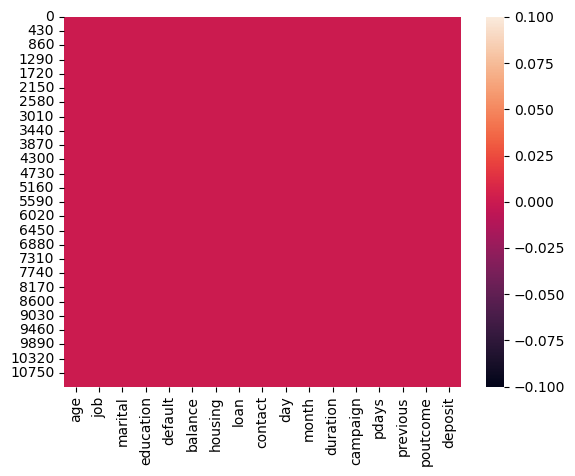

In [77]:
sns.heatmap(df.isnull())

# We can see that no null values, which is 0.00, the uniform color is representing this value.

# Checking for value counts

In [78]:
for i in df:
    print(df[i].value_counts)
    print("\n")

<bound method IndexOpsMixin.value_counts of 0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object>


<bound method IndexOpsMixin.value_counts of 0        married
1        married
2        married
3        married
4        married
          ...   
11157     single
11158    married
11159     single
11160    married
11161    married
Name: marital, Length: 11162, dtype: object>


<bound method IndexOpsMixin.value_counts of 0        secondary
1        secondary
2        secondary
3        secondary
4         tertiary
           ...    
11157      primary
11158    

There are no widespaces or blanks in this dataset. But there are unknown values which later will enconter issues. So converting
the unknown to mean or mode respectively will be the best option.
We can see different value counts for different entities in each columns.

# Getting the unique values

In [3]:
df['deposit'].nunique() #target

2

# There are just 2 values in target 'deposit' which are 'yes' and 'no'. So this is a case of logistic regression in terms of regression. Again we can see it as a classification problem also, with just 2 values. Naive Bayes, SVC, DTC and other classifications can be applied.


In [79]:
df.nunique().to_frame('Term Deposit Analysis')

,Term Deposit Analysis
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


We can see different counts of unique values.

# Statistical Summary

In [104]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Observations:
1. Counts: All the rows have same count, so there are no missing values.
2. There are negative values as well in the dataset. 
3. Standard deviation: Is more for majority of the columns, which means the data is widely spread. So there will be outliers. 4. Skewness: Mean is greater than median in all rows. So there is right-ward skewness which have major difference.
5. Outliers: Max values and 75% values differ vastly in all columns. So there are bound to be lot of outlier points.
6. Minimum values for age are 18, min balance is -6847, minimum dat is 1 and duration is 2. Similary we can find other values. We can also find the 25% values also respectively.

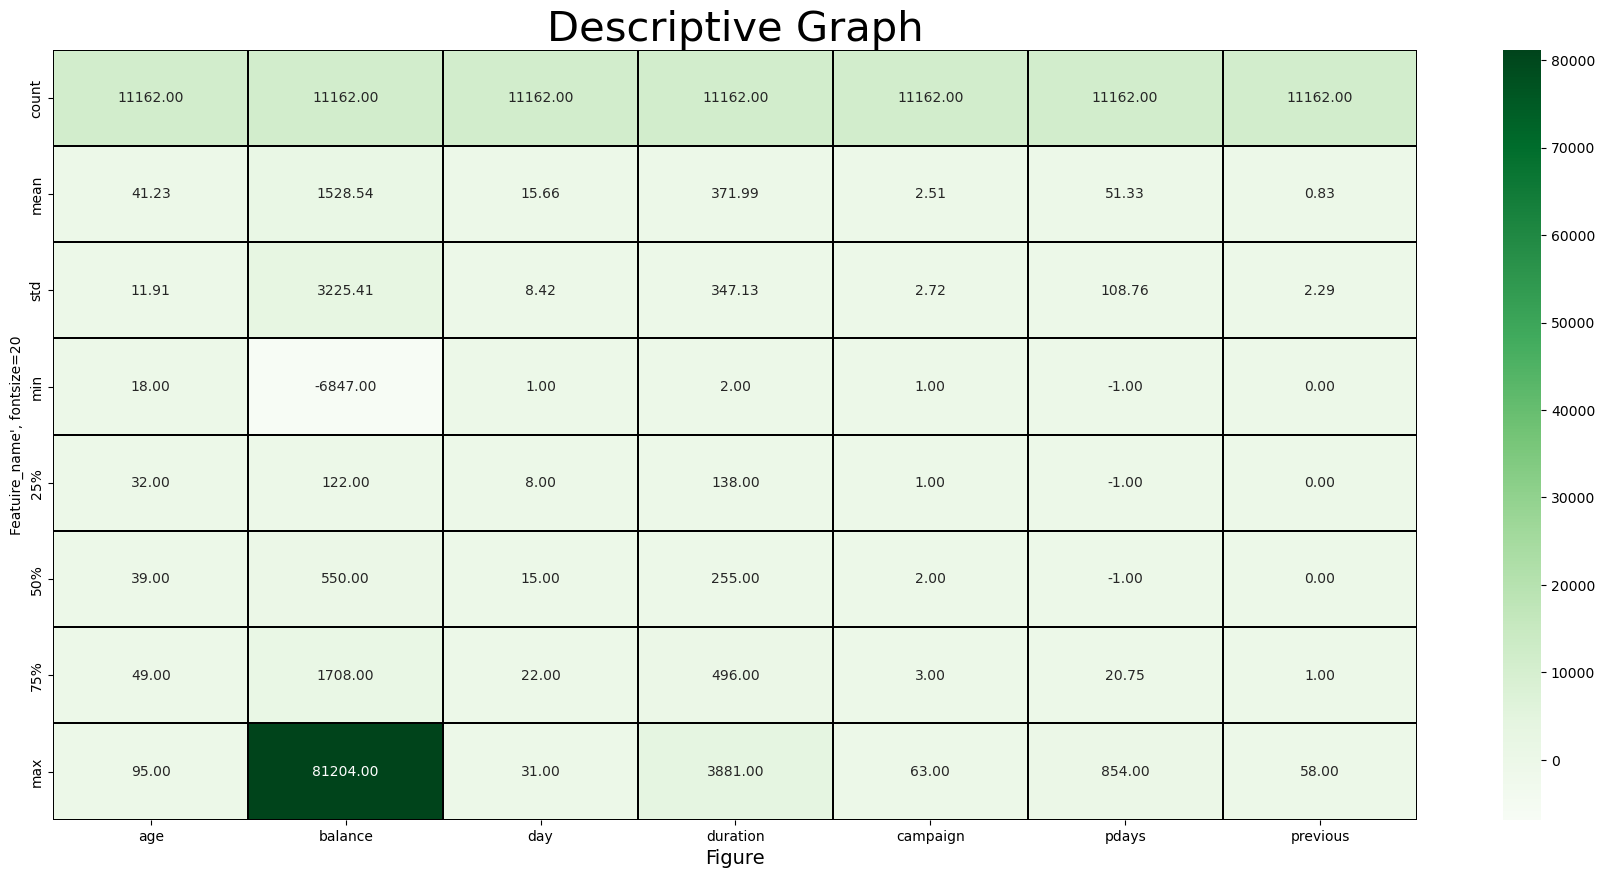

In [105]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap="Greens")
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


sns heatmap also gives the same description of df.describe() in a graphical method.

# Dividing the data into numerical and categorical column

In [151]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:", categorical_col)
    

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [154]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# GRAPHICAL EDA WITH UNIVARIATE ANALYSIS AND OTHERS

Since there are unknown terms in the dataset, we will check with count plots and value counts of each column and remove those.

In [158]:
#-1 VALUES IN PDAYS/REPLACING WITH NAN AND THEN TO MEAN
df['pdays']=df['pdays'].replace(-1, np.NaN)


In [159]:
np.mean(df['pdays'])


204.8181818181818

In [160]:
df['pdays']=df['pdays'].fillna(df['pdays'].mean())

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

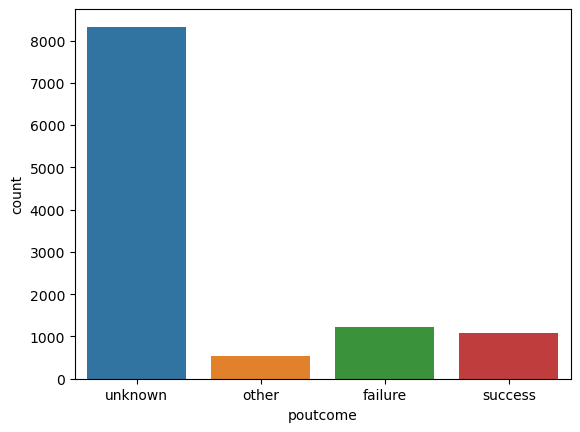

In [84]:
sns.countplot(data=df, x='poutcome')
df['poutcome'].value_counts()

In [161]:
df['poutcome']=df['poutcome'].replace('unknown','failure')

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

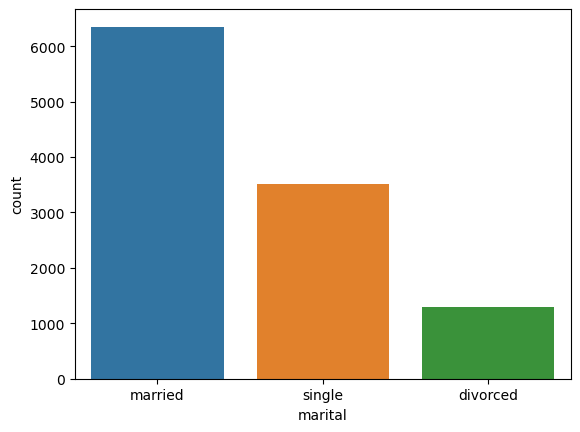

In [86]:
sns.countplot(data=df, x='marital')
df['marital'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

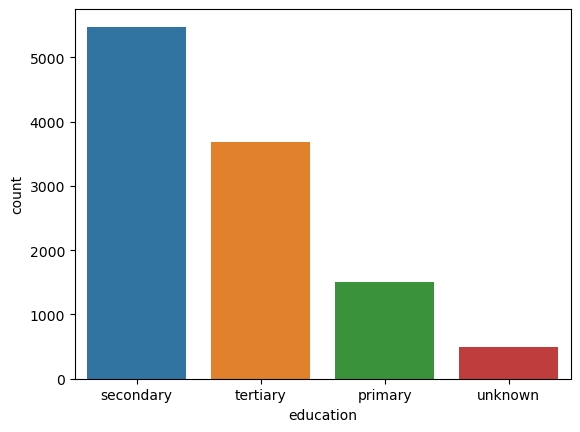

In [87]:
sns.countplot(data=df, x='education')
df['education'].value_counts()

In [162]:
df['education']=df['education'].replace('unknown','secondary')

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

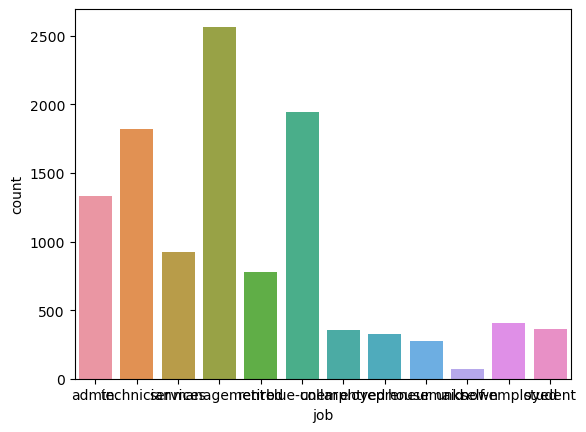

In [90]:
sns.countplot(data=df, x='job')
df['job'].value_counts()

In [163]:
df['job']=df['job'].replace('unknown','management')

no     10994
yes      168
Name: default, dtype: int64

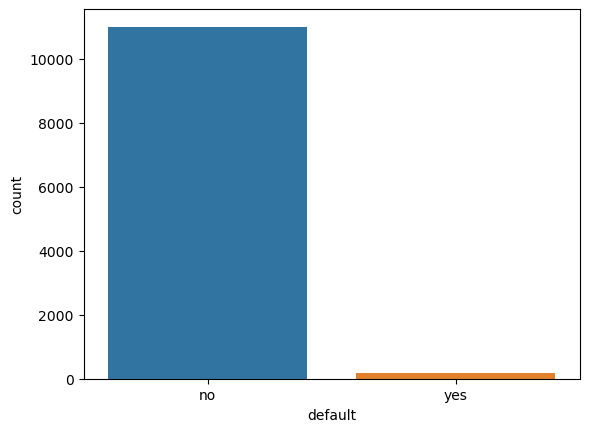

In [37]:
sns.countplot(data=df, x='default')
df['default'].value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

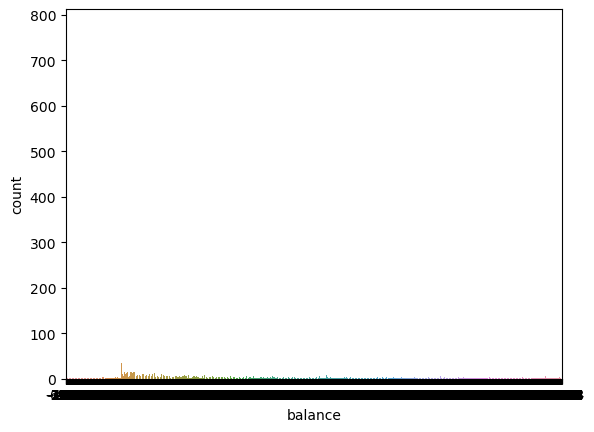

In [92]:
sns.countplot(data=df, x='balance')
df['balance'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

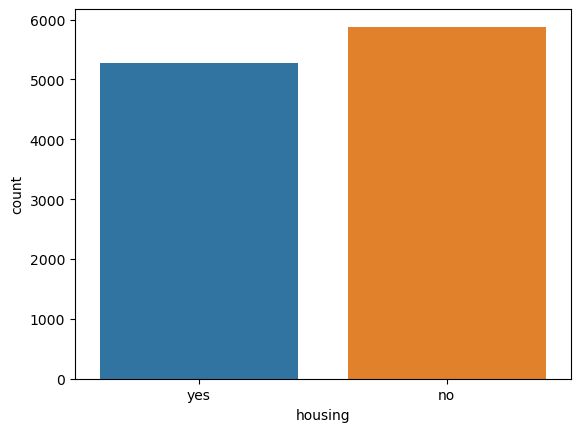

In [93]:
sns.countplot(data=df, x='housing')
df['housing'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

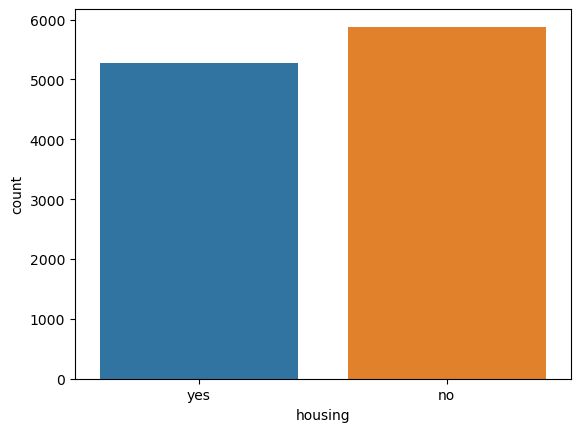

In [94]:
sns.countplot(data=df, x='housing')
df['loan'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

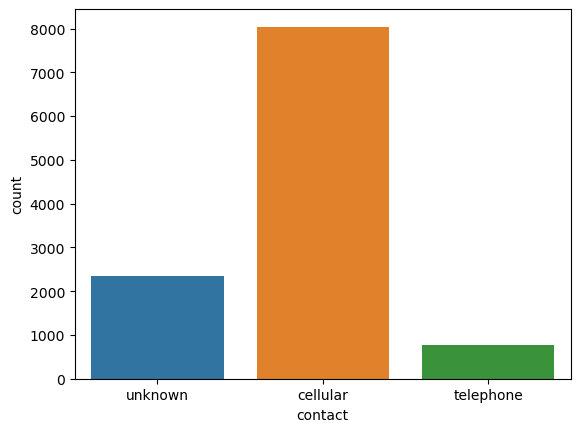

In [95]:
sns.countplot(data=df, x='contact')
df['contact'].value_counts()

In [165]:
df['contact']=df['contact'].replace('unknown','cellular')

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

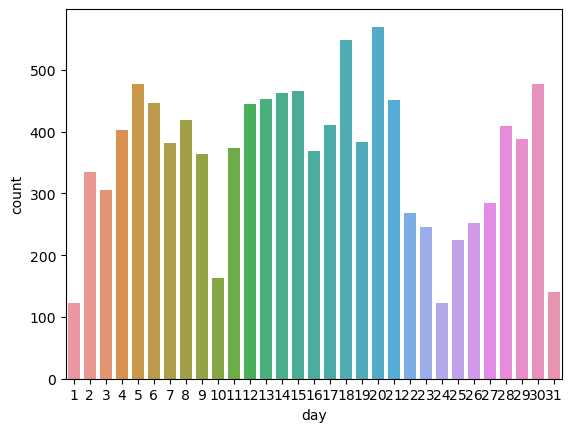

In [96]:
sns.countplot(data=df, x='day')
df['day'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

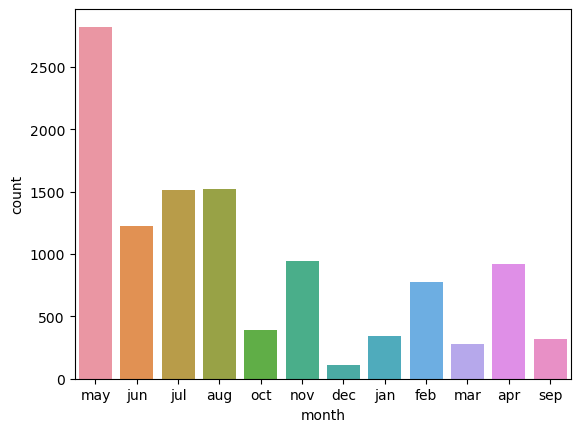

In [97]:
sns.countplot(data=df, x='month')
df['month'].value_counts()

97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: duration, Length: 1428, dtype: int64

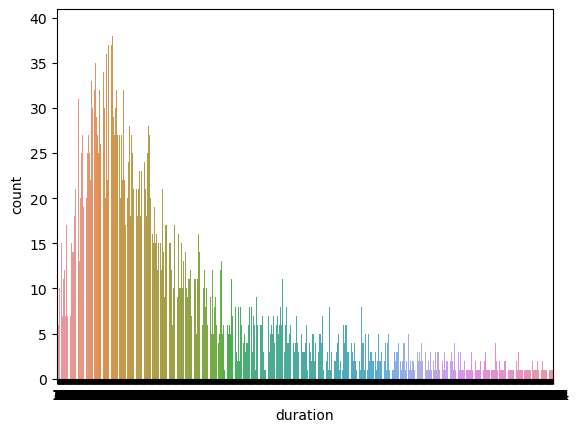

In [59]:
sns.countplot(data=df, x='duration')
df['duration'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

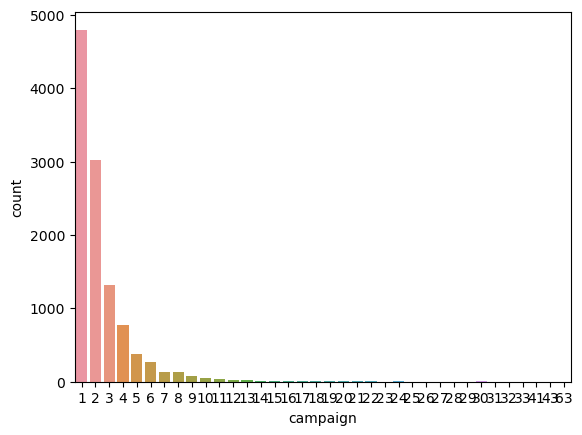

In [61]:
sns.countplot(data=df, x='campaign')
df['campaign'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

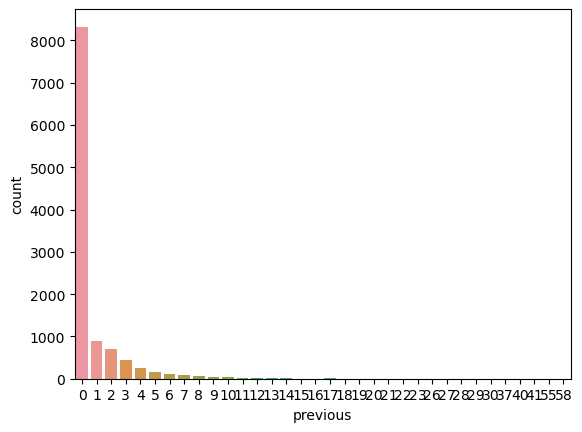

In [62]:
sns.countplot(data=df, x='previous')
df['previous'].value_counts()

failure    9554
success    1071
other       537
Name: poutcome, dtype: int64

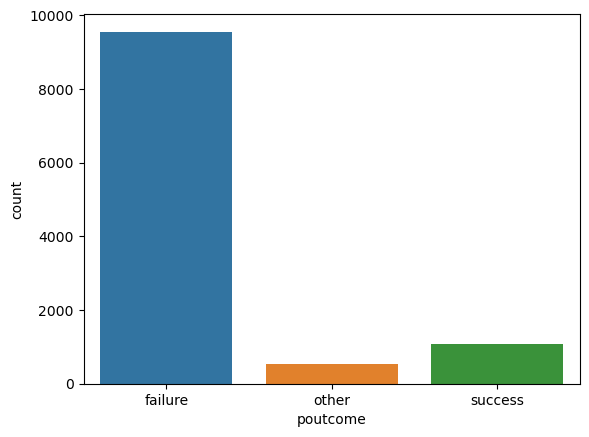

In [100]:
sns.countplot(data=df, x='poutcome') #As I have already converted these values before iteself, could not demonstrate unknown now.
df['poutcome'].value_counts()

In [166]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,204.818182,0,failure,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,204.818182,0,failure,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,204.818182,0,failure,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,204.818182,0,failure,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,204.818182,0,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,204.818182,0,failure,no
11158,39,services,married,secondary,no,733,no,no,cellular,16,jun,83,4,204.818182,0,failure,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,204.818182,0,failure,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172.000000,5,failure,no


We can see that all the columns have been changed with frequently occuring values of mean accordingly.

# Histograms

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

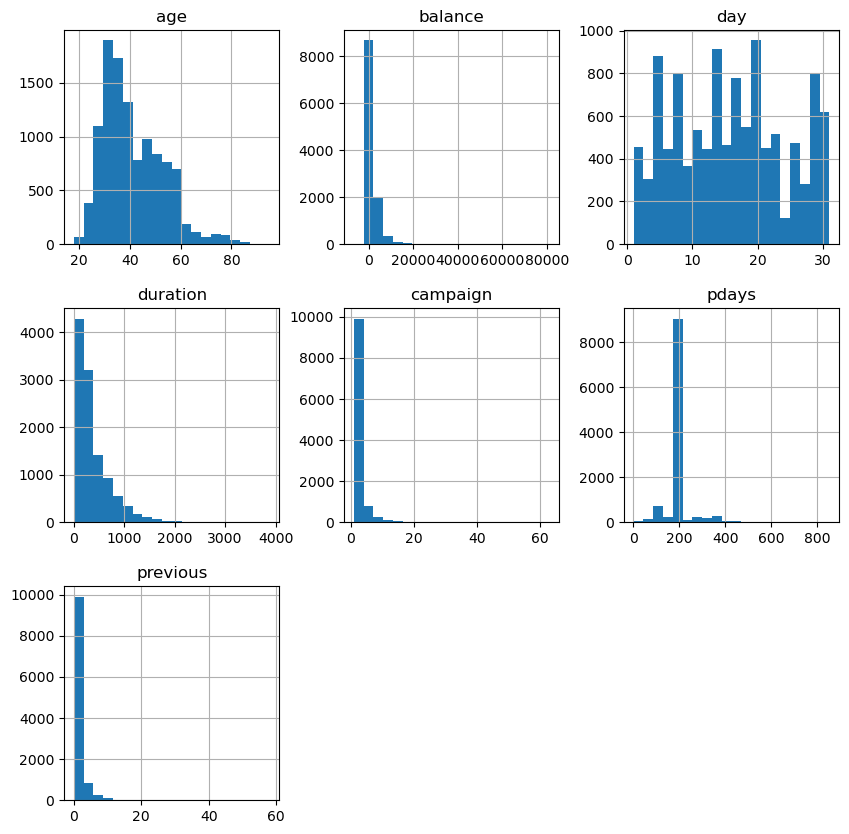

In [209]:
df.hist(bins=20, figsize=(10, 10))

Histograms show the distribution of data. Age and day have a normal distribution of data. Rest others have right-sided skewness.

# Box Plots for outliers

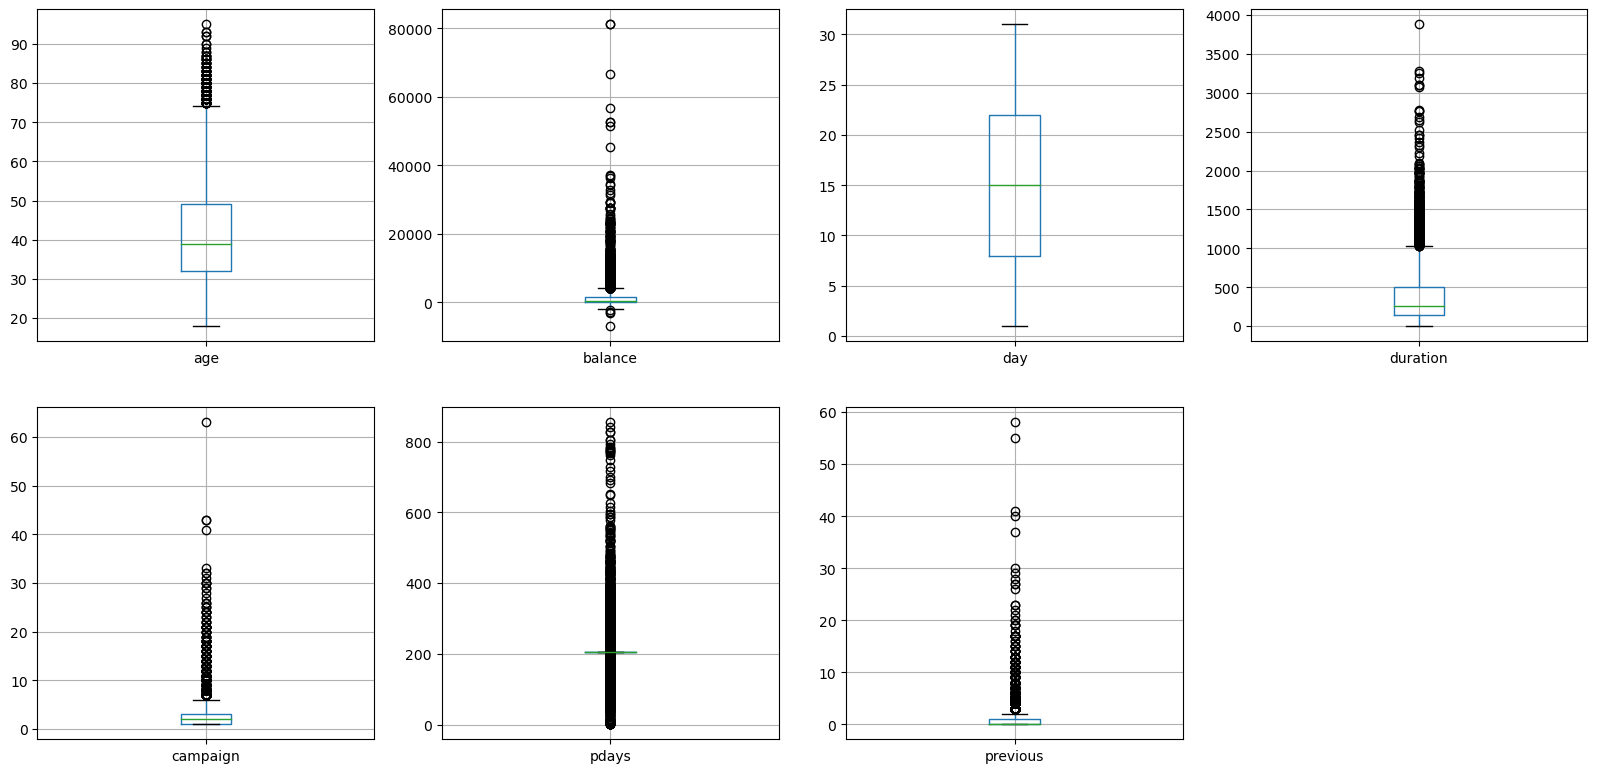

In [208]:
plt.figure(figsize=(20, 25))
p=1
for i in numerical_col:
    if p<=22:
        plt.subplot(5, 4 , p)
        df.boxplot([i])
    p+=1
plt.show()

In [167]:
out_features=df[['age', 'balance', 'duration', 'campaign','pdays', 'previous']]

In [168]:
from scipy.stats import zscore
z=np.abs(zscore(out_features)) 
z

,age,balance,duration,campaign,pdays,previous
0,1.491505,0.252525,1.930226,0.554168,0.000000,0.363260
1,1.239676,0.459974,3.154612,0.554168,0.000000,0.363260
2,0.019470,0.080160,2.929901,0.554168,0.000000,0.363260
3,1.155733,0.293762,0.596366,0.554168,0.000000,0.363260
4,1.071790,0.416876,0.867171,0.186785,0.000000,0.363260
...,...,...,...,...,...,...
11157,0.691015,0.473616,0.331287,0.554168,0.000000,0.363260
11158,0.187357,0.246658,0.832564,0.547981,0.000000,0.363260
11159,0.774958,0.464934,0.622258,0.186785,0.000000,0.363260
11160,0.148416,0.473926,1.045752,0.186785,0.532716,1.818332


In [110]:
np.where(z>3)

(array([    1,    11,    12, ..., 11054, 11074, 11140], dtype=int64),
 array([2, 2, 2, ..., 5, 3, 3], dtype=int64))

In [111]:
z.iloc[1, 2] #zscore >3

3.1546116096227013

In [112]:
z.iloc[11, 2] #zscore is greater than 3.

3.4628687207463402

In [169]:
df1=df[(z<3).all(axis=1)] 

In [114]:
df1.shape

(10098, 17)

In [170]:
df.shape

(11162, 17)

In [171]:
print("Old DataFrame:", df.shape[0])
print("New DataFrame:", df1.shape[0])
print("Dataloss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old DataFrame: 11162
New DataFrame: 10080
Dataloss percentage: 9.693603296900196


There is 9.6% data loss, less than 10%, which is affordable. Still we can try IQR method and check.

In [172]:
df=df1

In [218]:
q1=out_features.quantile(0.25)
q3=out_features.quantile(0.75)
IQR=q3-q1

In [219]:
df2=df[-((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

In [220]:
df2.shape

(6523, 17)

In [221]:
print("Old DataFrame:", df.shape[0])
print("New DataFrame:", df2.shape[0])
print("Dataloss percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Old DataFrame: 10080
New DataFrame: 6523
Dataloss percentage: 35.28769841269842


There is 35% data loss, sp we cannot go with this method.

# Bivariate Analysis

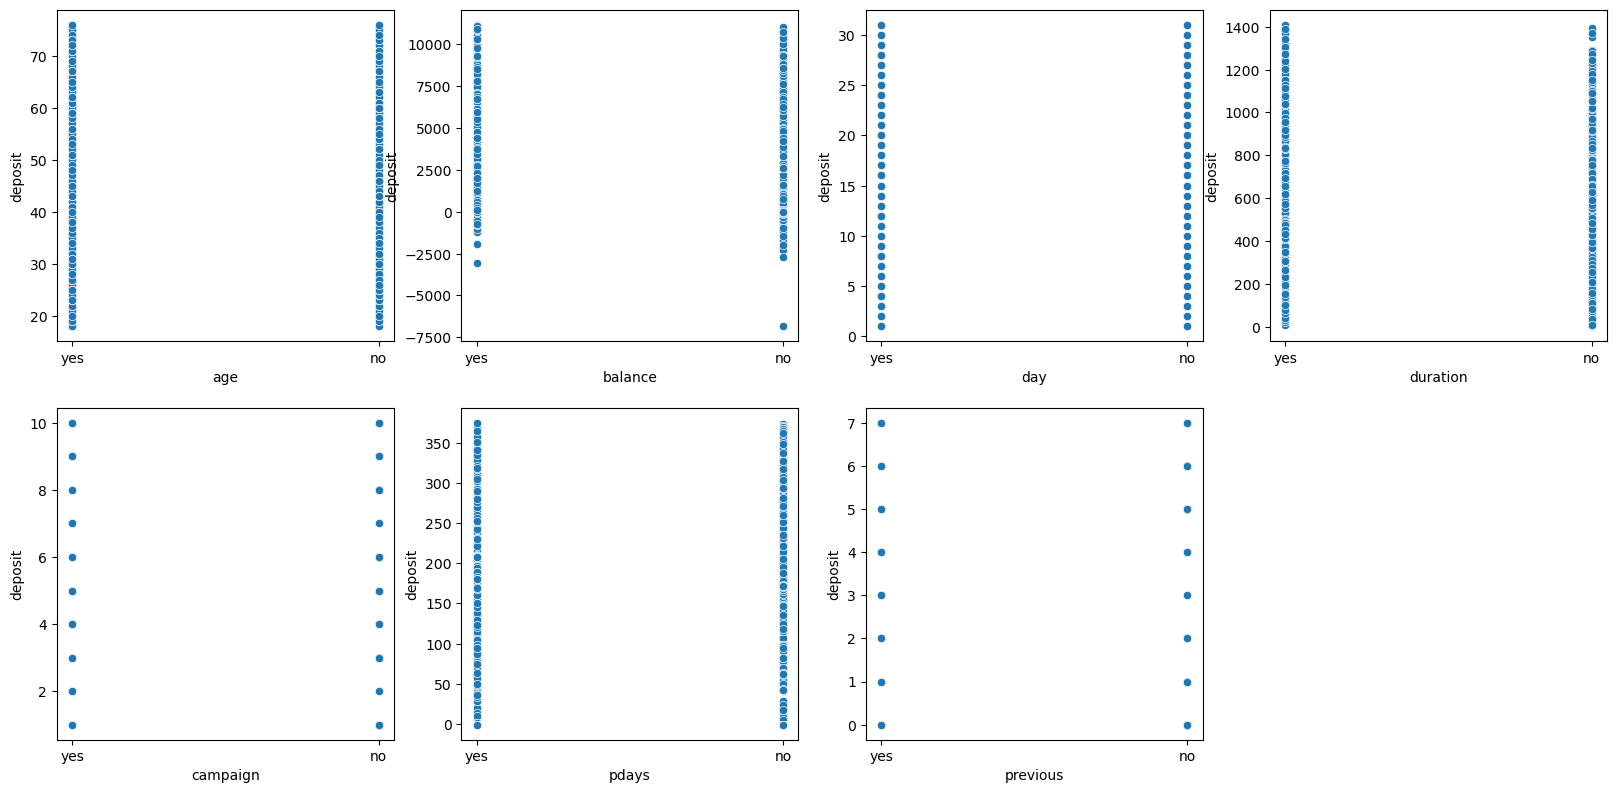

In [118]:
plt.figure(figsize=(20, 25))
p=1
for i in df[numerical_col]:
    if p<=13:
        plt.subplot(5,4,p)
        sns.scatterplot(x='deposit', y=i, data=df, palette ='bright')
        plt.xlabel(i)
        plt.ylabel('deposit')
    p+=1
plt.show()

The graph shows equal number of people who have deposited and not deposited in all age groups. The second graph shows balance
which is again having equal yes and no numbers almost. The campaign an previous columns have less points in both yes and no.

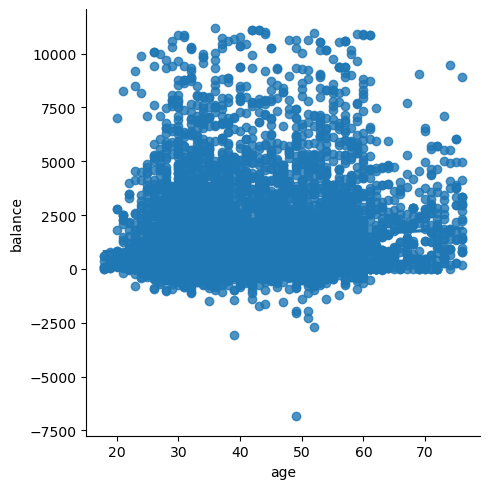

In [119]:
sns.lmplot(x='age', y='balance', data=df, palette='colorblind')

Here age and balance are highly and positively correlated. Irrespecitve of age, all have a positive balance and a just a few
have negative balance. 

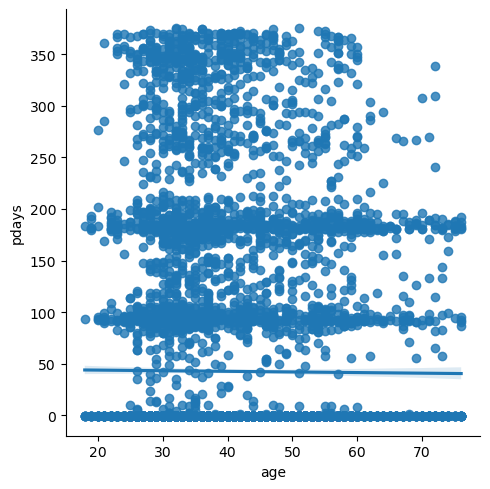

In [45]:
sns.lmplot(x='age', y='pdays', data=df, palette='colorblind')

Here, we have a positve correlation but not a strong one as the line of best fit is not passing through majority of points.

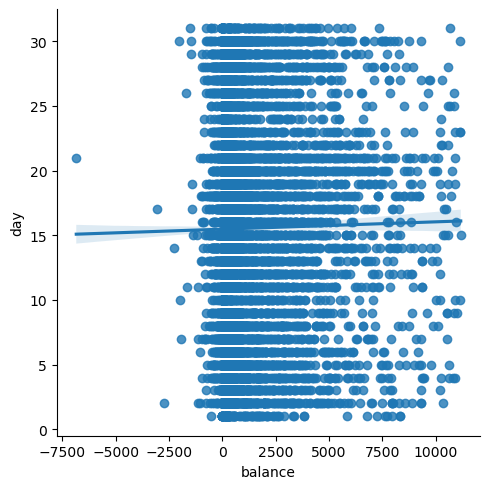

In [120]:
sns.lmplot(x='balance', y='day', data=df, palette='colorblind')

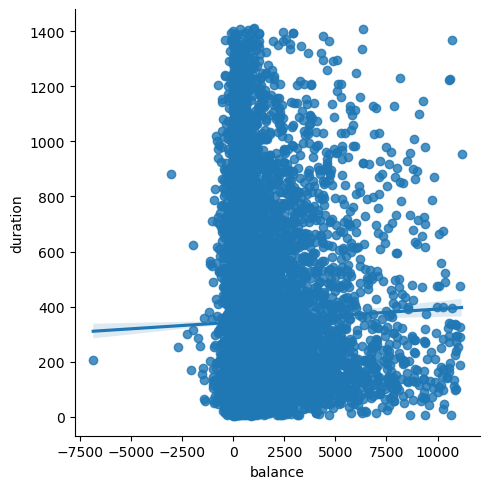

In [47]:
sns.lmplot(x='balance', y='duration', data=df, palette='colorblind')

Balance and duration also have strong and postive correlation. 

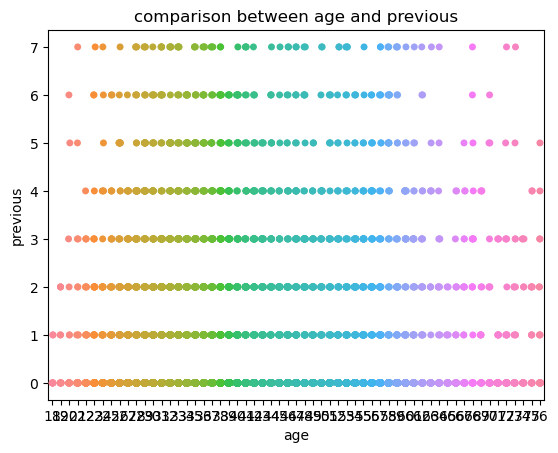

In [48]:
plt.title("comparison between age and previous")
sns.stripplot(x='age', y='previous', data=df)
plt.show()

Stripplot shows that as 'previous' value increases, there is a reduction in the data points. 

In [ ]:
#for categorical data

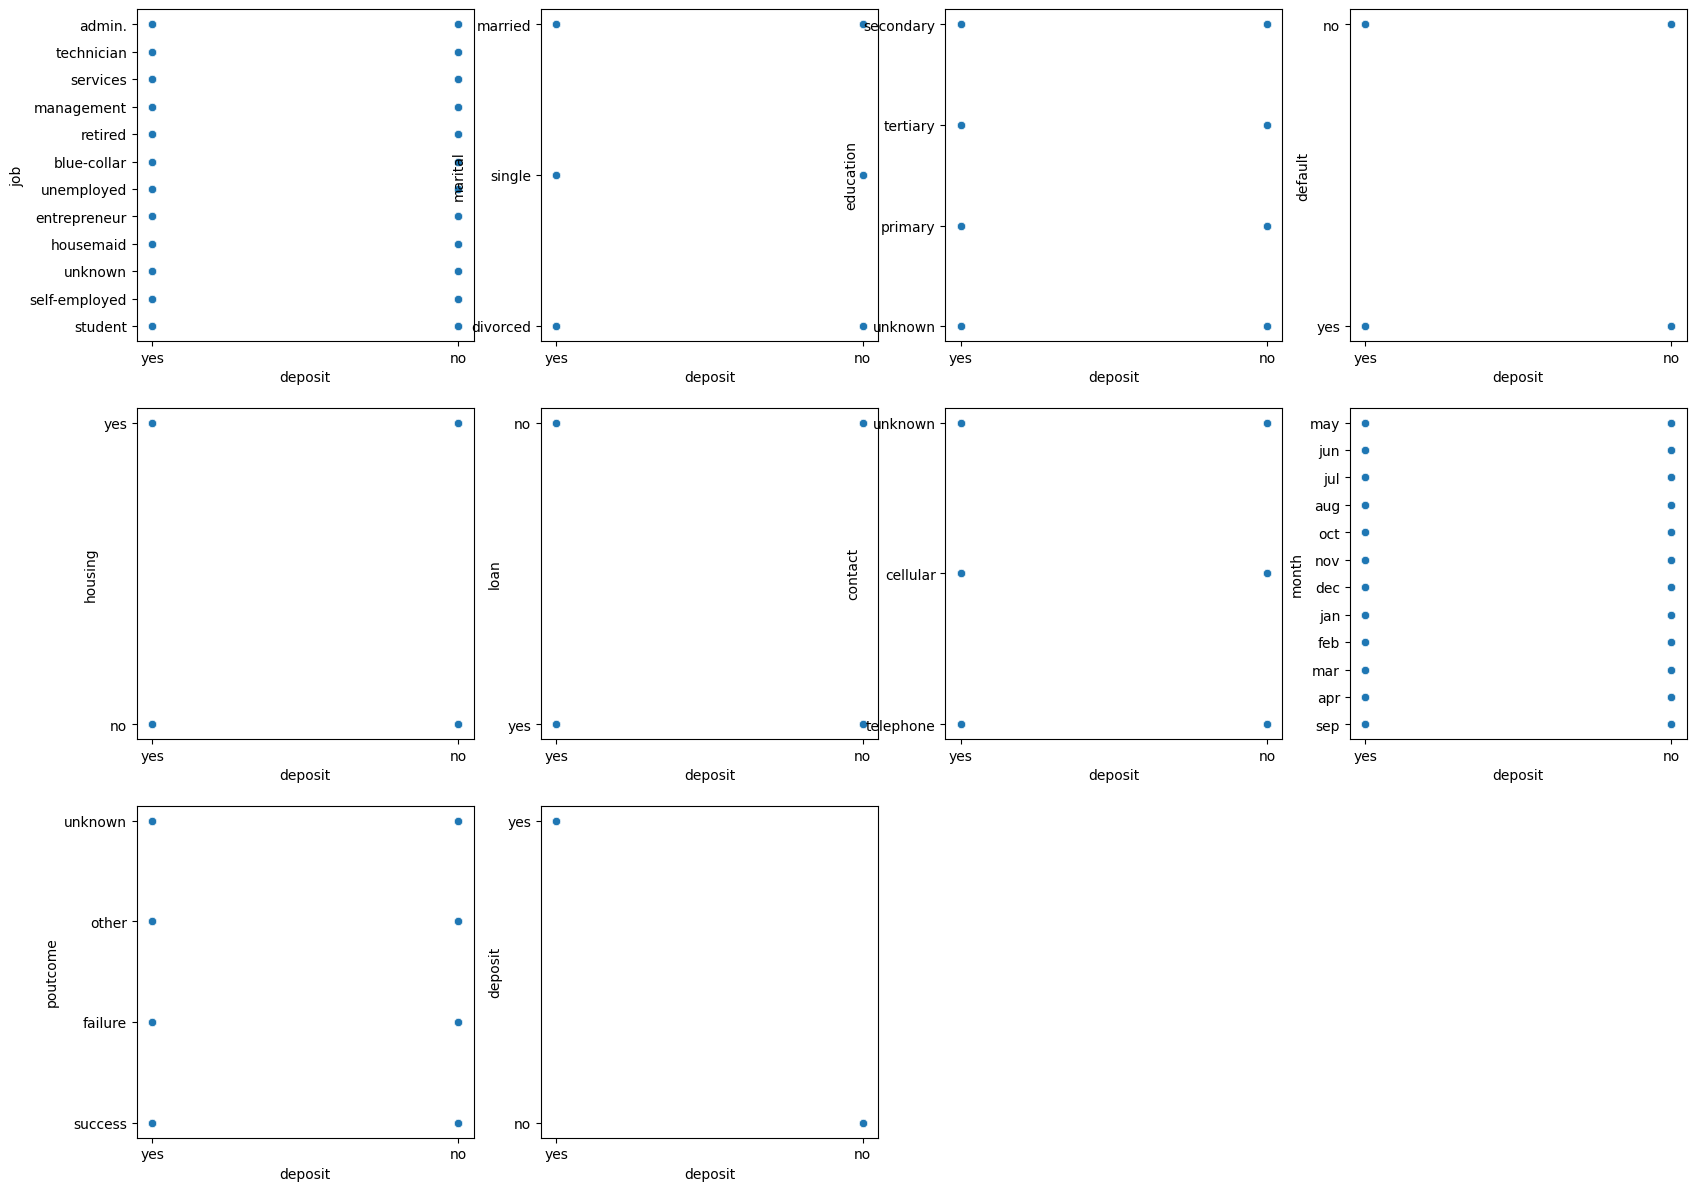

In [84]:
plt.figure(figsize=(20, 25))
p=1
for i in categorical_col:
    if p<=13:
        plt.subplot(5, 4 , p)
        sns.scatterplot(x='deposit', y=i, data=df, palette ='bright')
        plt.xlabel('deposit')
        plt.ylabel(i)
    p+=1
plt.show()



# Multivariate Analysis

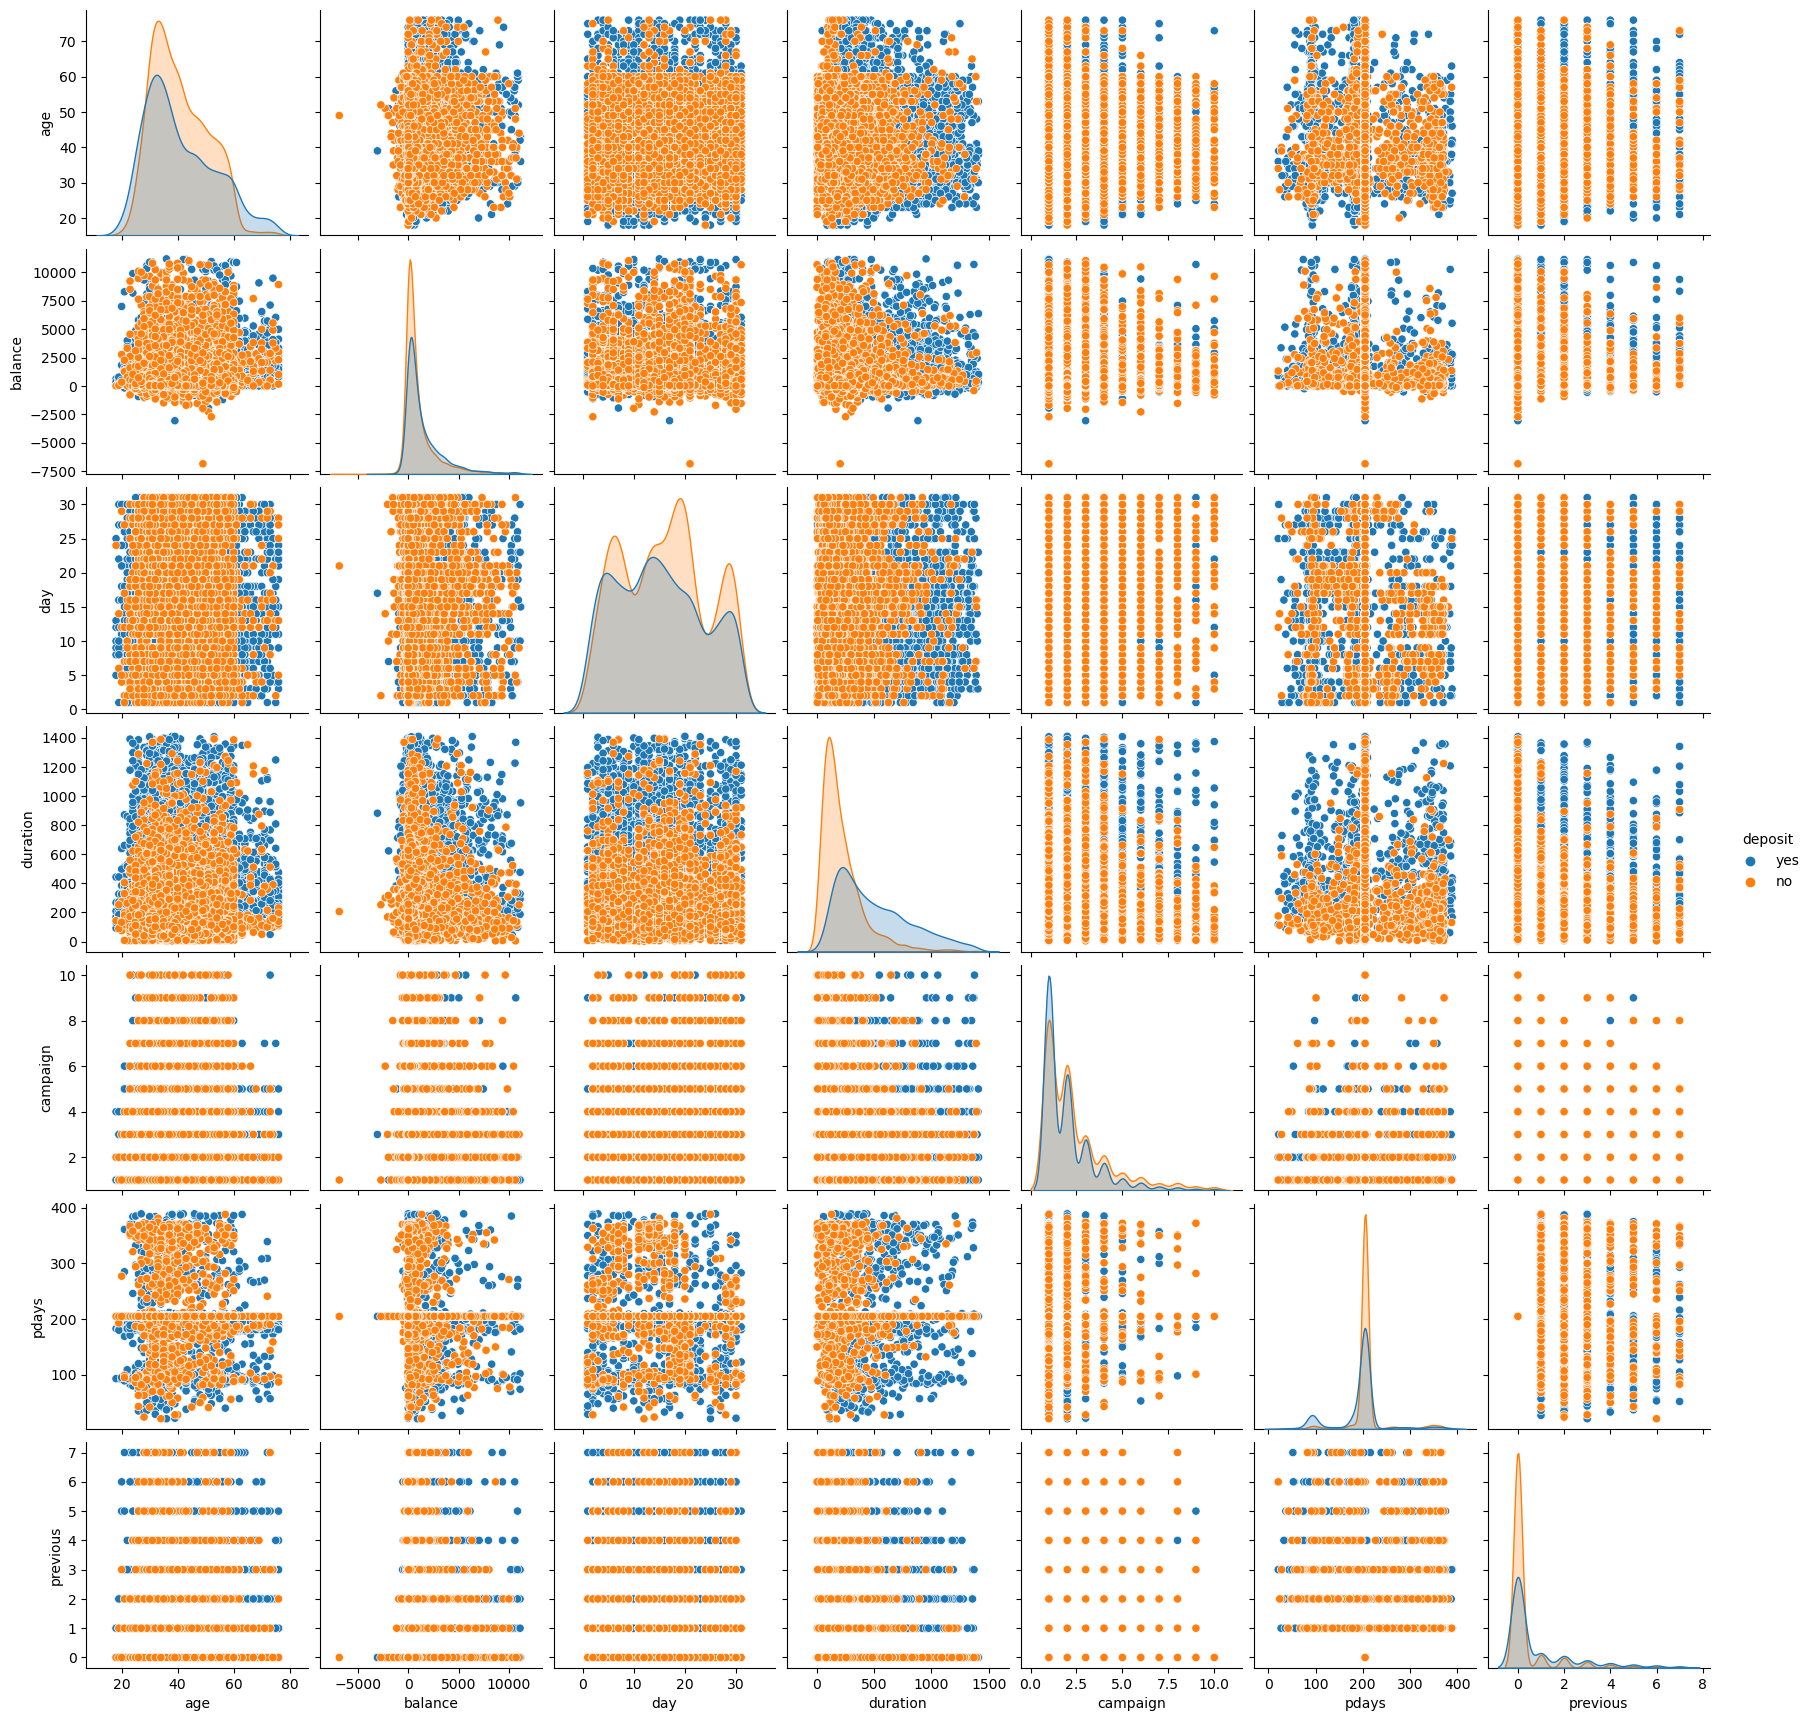

In [223]:
sns.pairplot(df, hue='deposit')

The pair plot gives pairwise relationship with each variable with other. The diagonal gives the distribution of the data.

# Calculating skewness

In [173]:
df.skew()

age         0.632984
balance     2.346427
day         0.127895
duration    1.354678
campaign    1.969323
pdays       0.421612
previous    2.643998
dtype: float64

In [174]:
df['age']=np.sqrt(df['age'])
df['balance']=np.sqrt(df['balance'])
df['duration']=np.sqrt(df['duration'])
df['campaign']=np.sqrt(df['campaign'])
df['pdays']=np.sqrt(df['pdays'])
df['previous']=np.sqrt(df['previous'])



In [175]:
df.skew()

age         0.363924
balance     0.932175
day         0.127895
duration    0.597700
campaign    1.227967
pdays      -0.825266
previous    1.707457
dtype: float64

applying cube roots for those already applied sqrt.

In [176]:

df['previous']=np.cbrt(df['previous'])
df['campaign']=np.cbrt(df['campaign'])
df['balance']=np.cbrt(df['balance'])


In [177]:
df.skew()

age         0.363924
balance    -1.081826
day         0.127895
duration    0.597700
campaign    0.826904
pdays      -0.825266
previous    1.331266
dtype: float64

The skewness has been reduced in almost all the columns

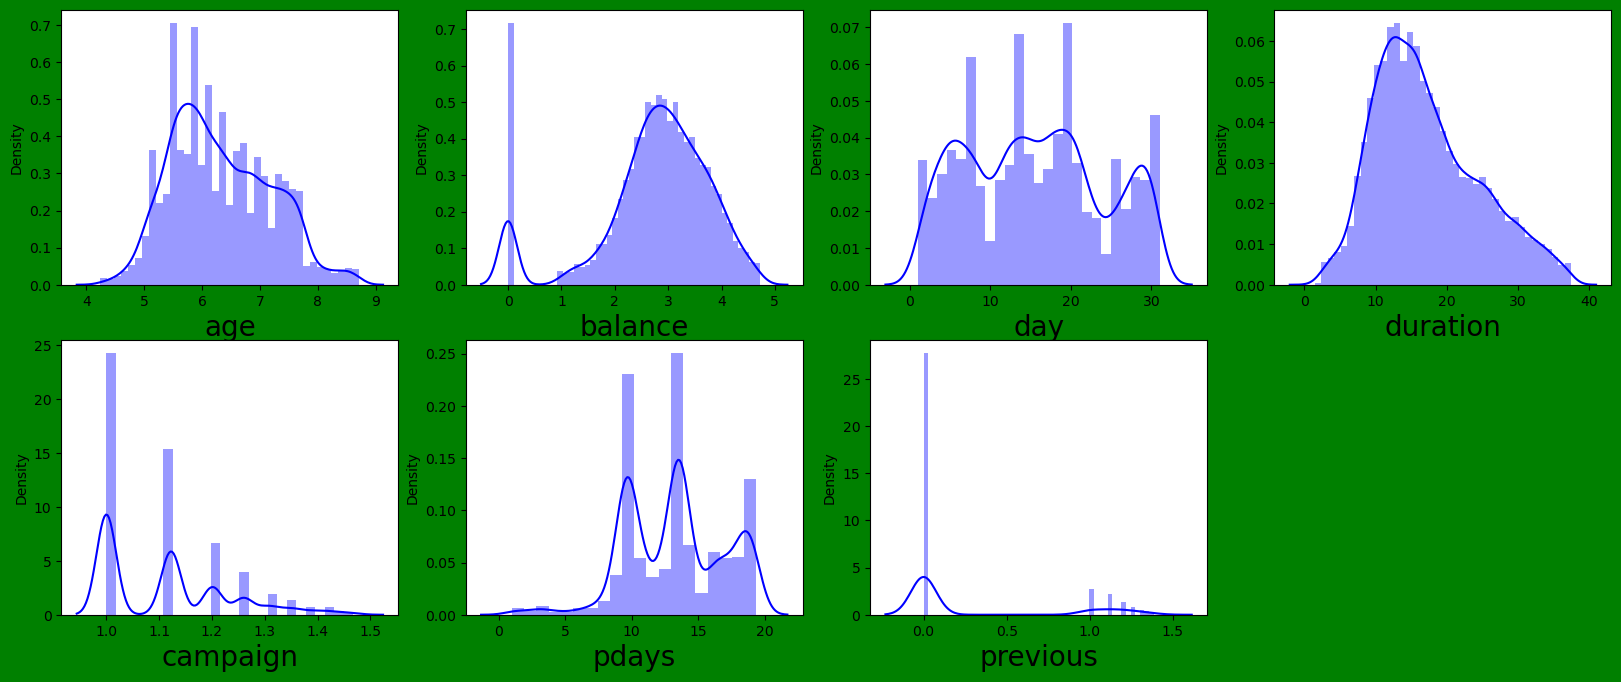

In [126]:
plt.figure (figsize=(20, 25), facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

The distribution of data is now normal after the reduction of skeness in the numerical columns.

# Correlation with the variables.

In [127]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.062548,0.000579,-0.008066,0.025756,-0.041811,0.009683
balance,0.062548,1.000000,-0.009203,0.051481,-0.028907,-0.067691,0.064469
day,0.000579,-0.009203,1.000000,-0.031440,0.106463,-0.064025,-0.080427
duration,-0.008066,0.051481,-0.031440,1.000000,-0.031888,0.031835,-0.007528
campaign,0.025756,-0.028907,0.106463,-0.031888,1.000000,0.093156,-0.119983
pdays,-0.041811,-0.067691,-0.064025,0.031835,0.093156,1.000000,-0.097527
previous,0.009683,0.064469,-0.080427,-0.007528,-0.119983,-0.097527,1.000000


Age is positively related with balance, day, campaign, and previous columns.
There is a positive correlation of balance with age, duration, and previous and negative with day and pdays.
Similary we can see that day is positively correlated with age, campaign and negatively correlated with previous, balance, and 
duration. pdays is correlated positively with only duration and campaign. previous is negatively correlated with day, campaign,
pdays. 


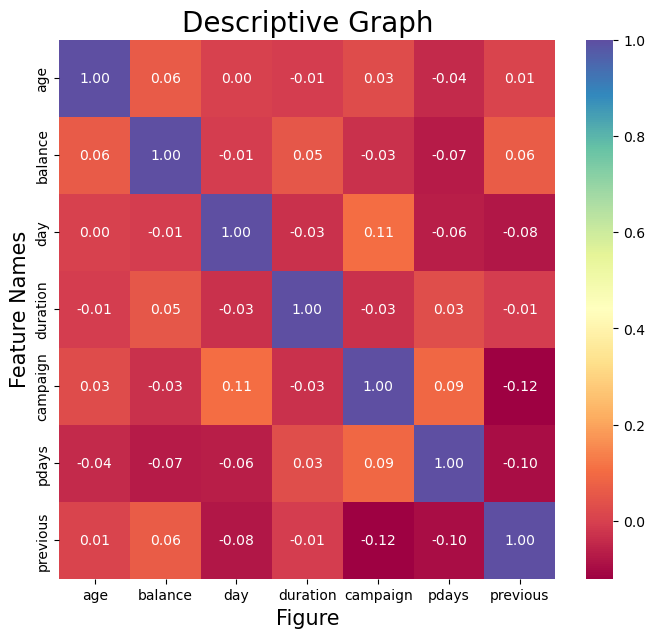

In [128]:
corr_hmap=df.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='Spectral')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

sns heatmap shows negatively correlated features wtih dark colors.  
Balance shows same values with age and duration. There is a multicollinearity issue over here.
Duration has same values again with age and previous with -0.01 and day and campaign of -0.03, which again has multicollinearity issue. 
Campaign shows same values of -0.03 with balance and duration. Again there is multicollinearity issue.

# Splitting x and y for VIF and other techniques

# Applying LabelEncoder to convert string columns into float datatype and scaling the data¶

In [178]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])

In [179]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,7.681146,0,1,1,0,3.644422,1,0,0,5,8,32.280025,1.000000,14.311470,0.00000,0,1
2,6.403124,9,1,1,0,3.290793,1,0,0,5,8,37.269290,1.000000,14.311470,0.00000,0,1
3,7.416198,7,1,1,0,3.678113,1,0,0,5,8,24.062419,1.000000,14.311470,0.00000,0,1
4,7.348469,0,1,2,0,2.384897,0,0,0,5,8,25.942244,1.122462,14.311470,0.00000,0,1
5,6.480741,4,2,2,0,0.000000,1,1,0,5,8,23.706539,1.122462,14.311470,0.00000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,5.744563,1,2,0,0,1.000000,1,0,0,20,0,16.031220,1.000000,14.311470,0.00000,0,0
11158,6.244998,7,1,1,0,3.002737,0,0,0,16,6,9.110434,1.259921,14.311470,0.00000,0,0
11159,5.656854,9,2,1,0,1.752803,0,0,0,19,1,12.489996,1.122462,14.311470,0.00000,0,0
11160,6.557439,9,1,1,0,0.000000,0,1,0,8,8,3.000000,1.122462,13.114877,1.30766,0,0


In [180]:
x=df.iloc[:, :-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,7.681146,0,1,1,0,3.644422,1,0,0,5,8,32.280025,1.000000,14.311470,0.00000,0
2,6.403124,9,1,1,0,3.290793,1,0,0,5,8,37.269290,1.000000,14.311470,0.00000,0
3,7.416198,7,1,1,0,3.678113,1,0,0,5,8,24.062419,1.000000,14.311470,0.00000,0
4,7.348469,0,1,2,0,2.384897,0,0,0,5,8,25.942244,1.122462,14.311470,0.00000,0
5,6.480741,4,2,2,0,0.000000,1,1,0,5,8,23.706539,1.122462,14.311470,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,5.744563,1,2,0,0,1.000000,1,0,0,20,0,16.031220,1.000000,14.311470,0.00000,0
11158,6.244998,7,1,1,0,3.002737,0,0,0,16,6,9.110434,1.259921,14.311470,0.00000,0
11159,5.656854,9,2,1,0,1.752803,0,0,0,19,1,12.489996,1.122462,14.311470,0.00000,0
11160,6.557439,9,1,1,0,0.000000,0,1,0,8,8,3.000000,1.122462,13.114877,1.30766,0


In [181]:
y=df.iloc[:, -1]
y

0        1
2        1
3        1
4        1
5        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 10080, dtype: int32

# Applying LabelEncoder to convert string columns into float datatype and scaling the data

In [183]:
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.578261,-1.380747,-0.323794,-0.304189,-0.125377,0.827789,1.046101,-0.393914,-0.253134,-1.256814,0.797088,2.055632,-0.932446,0.119455,-0.543258,-0.368762
1,0.092811,1.427930,-0.323794,-0.304189,-0.125377,0.492177,1.046101,-0.393914,-0.253134,-1.256814,0.797088,2.735635,-0.932446,0.119455,-0.543258,-0.368762
2,1.270311,0.803779,-0.323794,-0.304189,-0.125377,0.859764,1.046101,-0.393914,-0.253134,-1.256814,0.797088,0.935629,-0.932446,0.119455,-0.543258,-0.368762
3,1.191589,-1.380747,-0.323794,1.235079,-0.125377,-0.367566,-0.955930,-0.393914,-0.253134,-1.256814,0.797088,1.191837,0.100596,0.119455,-0.543258,-0.368762
4,0.183025,-0.132446,1.275346,1.235079,-0.125377,-2.630958,1.046101,2.538623,-0.253134,-1.256814,0.797088,0.887126,0.100596,0.119455,-0.543258,-0.368762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,-0.672638,-1.068672,1.275346,-1.843456,-0.125377,-1.681906,1.046101,-0.393914,-0.253134,0.530831,-1.722993,-0.158967,-0.932446,0.119455,-0.543258,-0.368762
10076,-0.090980,0.803779,-0.323794,-0.304189,-0.125377,0.218796,-0.955930,-0.393914,-0.253134,0.054126,0.167068,-1.102223,1.260146,0.119455,-0.543258,-0.368762
10077,-0.774582,1.427930,1.275346,-0.304189,-0.125377,-0.967457,-0.955930,-0.393914,-0.253134,0.411655,-1.407983,-0.641612,0.100596,0.119455,-0.543258,-0.368762
10078,0.272171,1.427930,-0.323794,-0.304189,-0.125377,-2.630958,-0.955930,2.538623,-0.253134,-0.899285,0.797088,-1.935032,0.100596,-0.588989,2.167053,-0.368762


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

MissingDataError: exog contains inf or nans

# Installing imbalanced-learn for checking version of numpy and sklearn version

In [185]:
pip install imbalanced-learn

# SMOTE Techniques applied since there is class difference in dataset. 

In [186]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x1.shape

In [ ]:
x=x1

In [ ]:
y1.shape

In [ ]:
y=y1

# Selecting the best accuracy score on best maximum random state

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
maxAcc=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=i)
    rfr=RandomForestClassifier()   
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum Accuracy is:", maxAcc, "at Random_State", maxRS)

# Splitting the data into training and testing on the basis of best accuracy and random state¶


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# Different algorithms being tested for the best score

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_lg))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_lg))
print("Classification_Report is:", classification_report(y_test, pred_lg))



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_gnb))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_gnb))
print("Classification_Report is:", classification_report(y_test, pred_gnb))



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_rfr))
print("Confusion_Matrix:",  confusion_matrix(y_test, pred_rfr))
print("Classification_Report is:", classification_report(y_test, pred_rfr))

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf') 
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_svc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification_Report is:", classification_report(y_test, pred_svc))


In [ ]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train, y_train)
pred_bc=bc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_bc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_bc))
print("Classification_Report is:", classification_report(y_test, pred_bc))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_etc=etc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_etc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_etc))
print("Classification_Report is:", classification_report(y_test, pred_etc))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier() #n_estimators=100, random_state=42)default
ad.fit(x_train, y_train)
pred_ad=ad.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_ad))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_ad))
print("Classification_Report is:", classification_report(y_test, pred_ad))